#### Bank Churn Prediction Model

#### In this notebook, I am trying to find a good prediction model to predict how any bank can know before hand the possibility of a customer leaving their bank. In order to do that we need to follow few steps.

1. Loaded the dataset and perform data cleaning.

2. Splited the dataset appropriately in training and test dataset.

3. Loaded the necessary features in the training set to train the model.

4. Used the model, perform out-of-sample testing on the test dataset.

5. Compared the different ML models' outcomes and chose the appropriate model after testing for the statistical significance of the parameters.

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df=pd.read_csv("C:/Users/Promi/OneDrive/Desktop/PythonProjects/datasets/Churn_Modelling1.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Here it shows no data is missing

### Exploratory Data Analysis

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### Here Gender and Geography are not in numeric form. We have to convert them to numeric form before starting the training process.

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df.iloc[:,3:13].head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


### Correlation

In [10]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [11]:
df.corr().iloc[2:11, 10:11]

,Exited
CreditScore,-0.027094
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097
Exited,1.000000


#### This shows age and balance has impact in churning

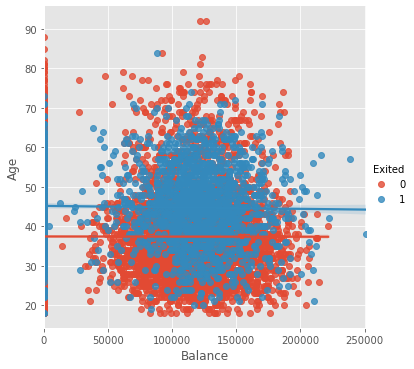

In [12]:
sns.lmplot(x="Balance", y="Age", hue="Exited", data=df);

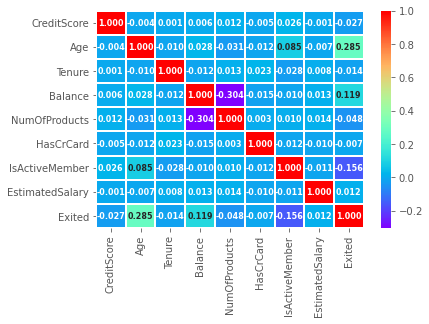

In [13]:
sns.heatmap(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                  'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']].corr(), cmap='rainbow',annot=True, fmt=".3f",annot_kws={'fontsize':8,'fontweight':'bold'},linewidth=1);

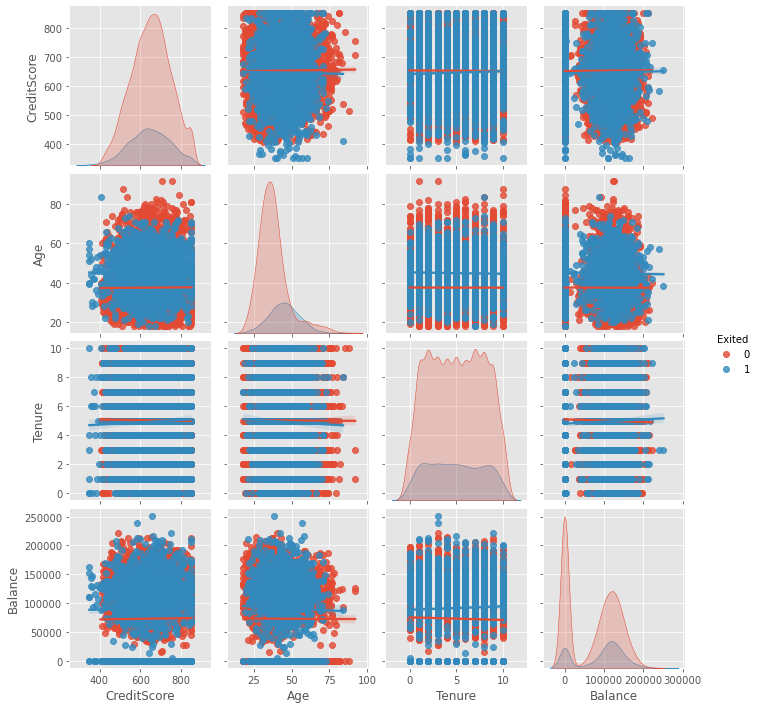

In [14]:
sns.pairplot(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'Exited']], hue="Exited",diag_kind='kde', kind='reg');

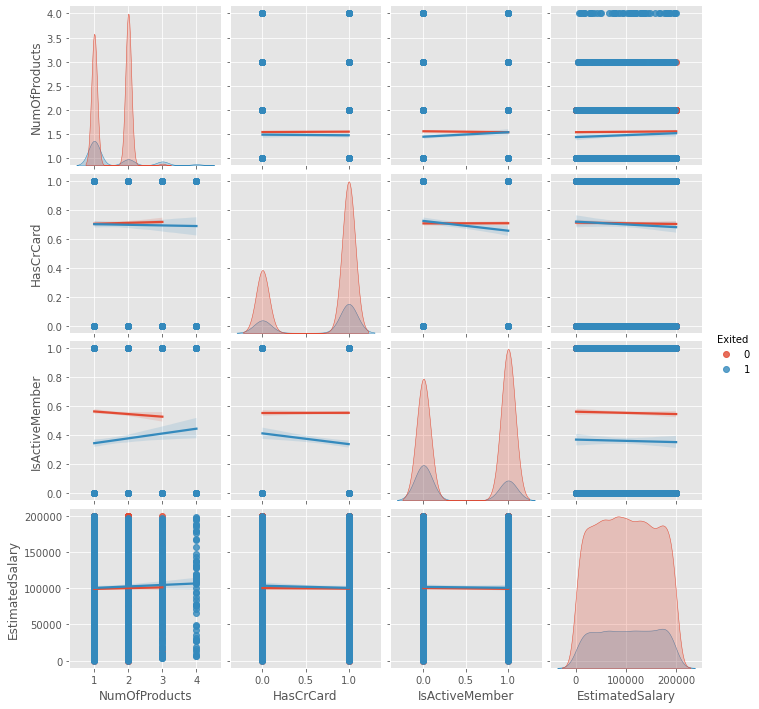

In [15]:
sns.pairplot(df[['NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']], hue="Exited",diag_kind='kde', kind='reg');

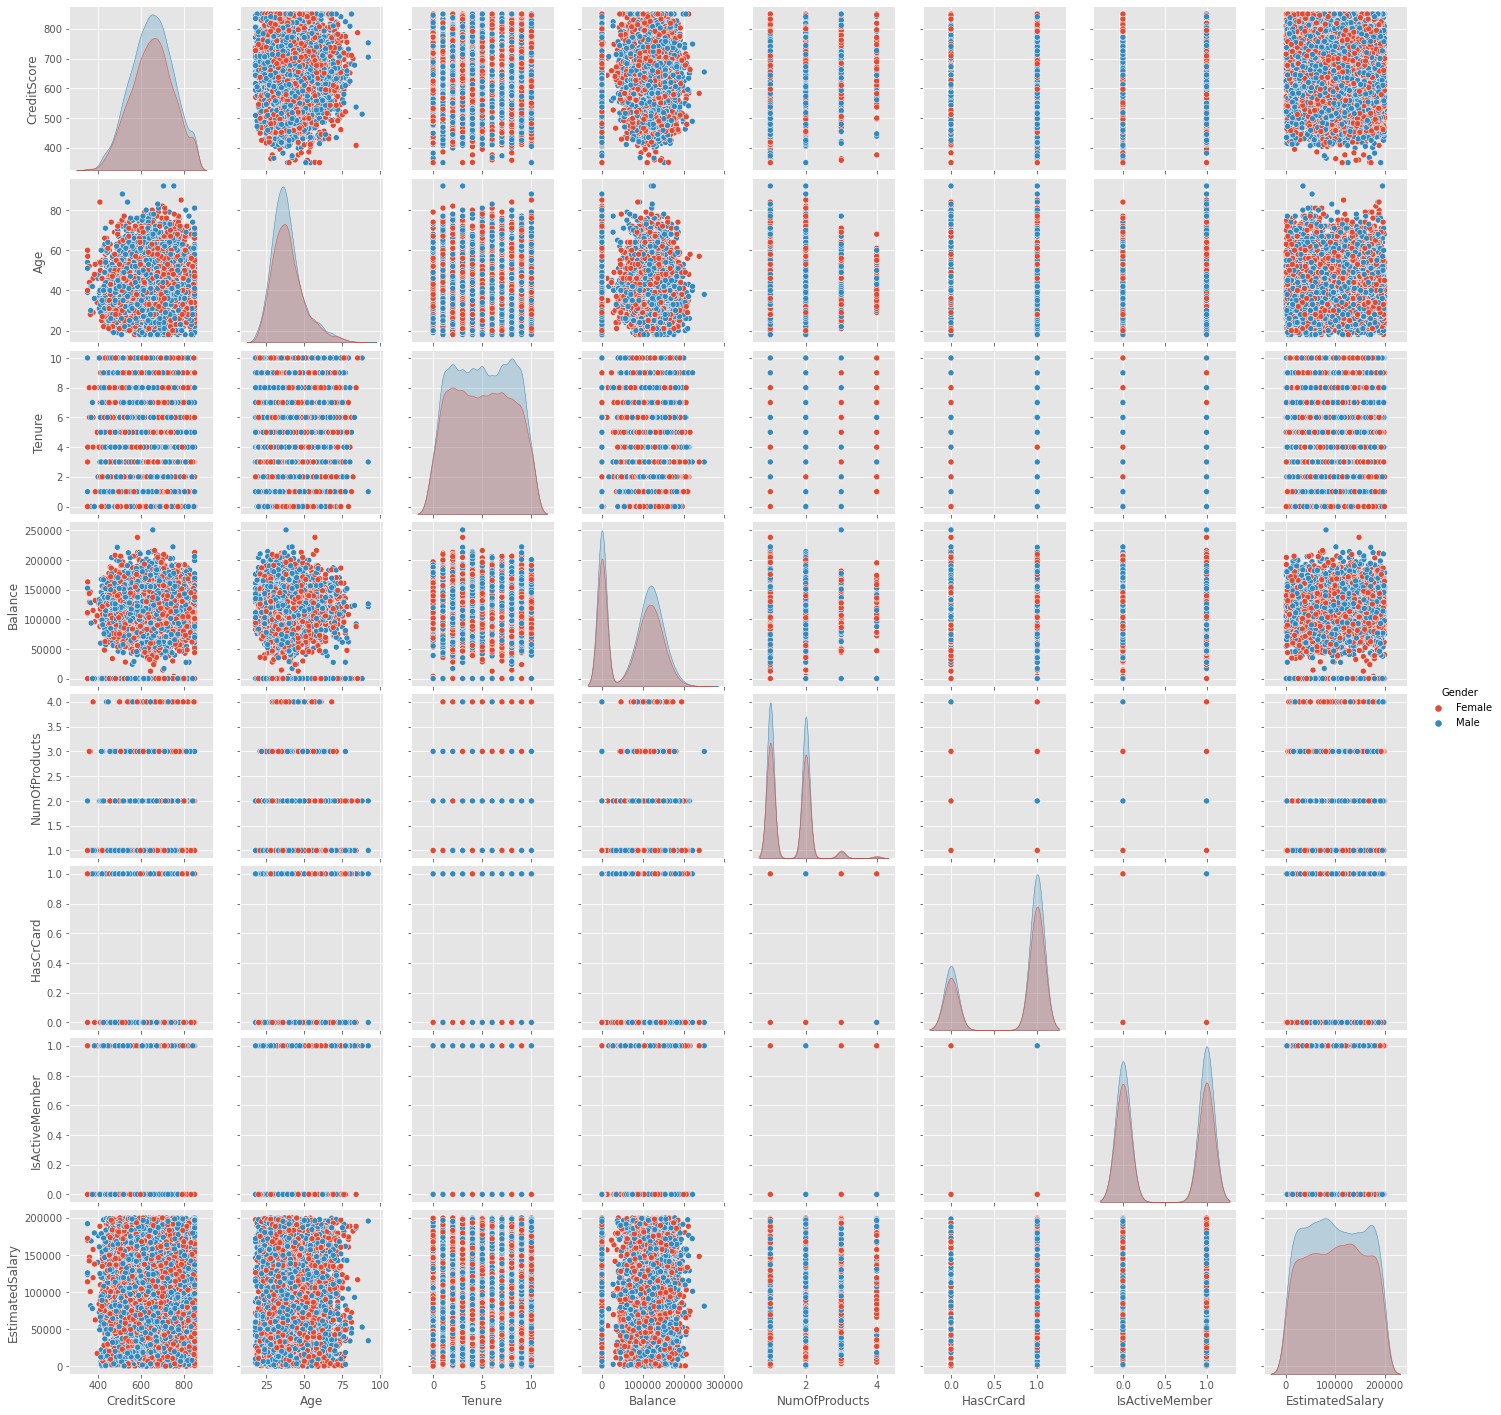

In [16]:
sns.pairplot(df, hue='Gender', vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary'])

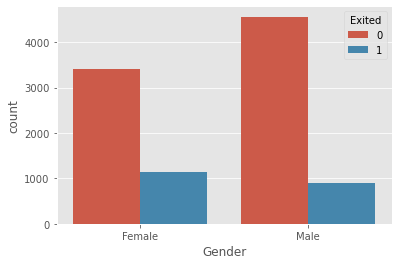

In [17]:
sns.countplot(x='Gender',data=df, hue='Exited');

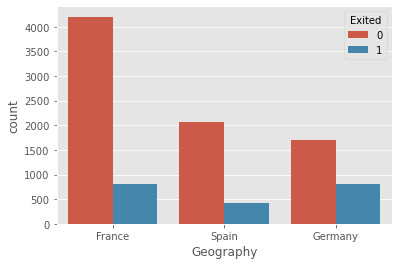

In [18]:
sns.countplot(x='Geography',data=df, hue='Exited');

### Spliting dataset into training and test data

In [24]:
X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values

In [26]:
pd.DataFrame(X).head(5)

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0.0,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.8,3,1,0,113931.57
3,699,France,Female,39,1,0.0,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.1


In [27]:
pd.DataFrame(y).head(5)

,0
0,1
1,0
2,1
3,0
4,0


#### Encoding Gender Column in numeric using LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [149]:
le=LabelEncoder()

In [150]:
X[:,1]=le.fit_transform(X[:,1])

In [151]:
X

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

#### Encoding Gender Column in numeric using LabelEncoder

In [152]:
X[:,2]=le.fit_transform(X[:,2])

In [153]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

#### Encoding OneHotEncoder

In [154]:
import warnings
warnings.filterwarnings("ignore")

In [155]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [157]:
pd.DataFrame(X).head(100)

,0,1,2,3,4,5,6,7,8,9
0,619,0,0,42,2,0.0,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.8,3,1,0,113931.57
3,699,0,0,39,1,0.0,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
95,515,2,1,35,10,176273.95,1,0,1,121277.78
96,773,2,1,41,9,102827.44,1,0,1,64595.25
97,814,1,1,29,8,97086.4,2,1,1,197276.13
98,710,2,1,22,8,0.0,2,0,0,99645.04


In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Logistic Regression

In [160]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

In [161]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1975
           1       0.34      0.05      0.08       525

    accuracy                           0.78      2500
   macro avg       0.57      0.51      0.48      2500
weighted avg       0.70      0.78      0.71      2500

[[1928   47]
 [ 501   24]]
   TN    FP
   FN    TP
Accuracy Score : 0.7808
F Score 0.05527406725011515


#### This model has 78% Accuracy, but very low F-score which means very low recall score. Considering  this problem it is not an ideal model.

## Decision Tree Model

In [164]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [165]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1975
           1       0.48      0.51      0.50       525

    accuracy                           0.78      2500
   macro avg       0.68      0.68      0.68      2500
weighted avg       0.79      0.78      0.79      2500

[[1689  286]
 [ 256  269]]
   TN    FP
   FN    TP
Accuracy Score : 0.7832
F Score 0.5065913370998117


#### This model has 78% Accuracy and 51% F-score. Also 53% recall score for True Positive cases of Exited. We can consider this model if no other model perform better than this.

## Gradient Boosting Classifier

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=101)
grad.fit(X_train,y_train)
predictions = grad.predict(X_test)

In [167]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1975
           1       0.80      0.50      0.61       525

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.77      2500
weighted avg       0.86      0.87      0.86      2500

[[1909   66]
 [ 263  262]]
   TN    FP
   FN    TP
Accuracy Score : 0.8684
F Score 0.5395387149917629


#### This model has 78% Accuracy and 51% F-score. Also 50% recall score for True Positive cases of Exited. It is also good as the previous one

## K-Nearest Neighbours

In [168]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

In [169]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1975
           1       0.21      0.21      0.21       525

    accuracy                           0.67      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.67      0.67      0.67      2500

[[1575  400]
 [ 417  108]]
   TN    FP
   FN    TP
Accuracy Score : 0.6732
F Score 0.2070552147239264


#### Low F-score and Recall score. Not applicable for the problem.

## Support Vector Machine

In [170]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

In [171]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1975
           1       0.00      0.00      0.00       525

    accuracy                           0.79      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.62      0.79      0.70      2500

[[1975    0]
 [ 525    0]]
   TN    FP
   FN    TP
Accuracy Score : 0.79
F Score 0.0


In [ ]:
F score is zero and Recall score i.e 0% chance to predict true positive cases for the model. Not suitable for 

## Naive Bayes

In [172]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)

In [173]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1975
           1       0.30      0.06      0.11       525

    accuracy                           0.77      2500
   macro avg       0.55      0.51      0.49      2500
weighted avg       0.69      0.77      0.71      2500

[[1896   79]
 [ 491   34]]
   TN    FP
   FN    TP
Accuracy Score : 0.772
F Score 0.07681879801174875


In [ ]:
Very low F score and recall score. Again not suitable for the model.

## Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [175]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1975
           1       0.81      0.50      0.62       525

    accuracy                           0.87      2500
   macro avg       0.85      0.73      0.77      2500
weighted avg       0.86      0.87      0.86      2500

[[1914   61]
 [ 263  262]]
   TN    FP
   FN    TP
Accuracy Score : 0.8704
F Score 0.5406520841931491


#### This model has 87% Accuracy and 55% F-score. Also 51% recall score for True Positive cases, which means it could identify 51% people who might leave the bank. 

#### After comparing all models, we can conclude that Random Forest Model is best model for this problem under current scenario, it has better Recall Score and Accuracy score than any other model.
This helps the bank to know which of their customers are at highest risk of leaving.

### Conclusion: 
**This helps the bank to detect which of their customers has high risk of leaving. This would help the bank to do targeted marketing twho have high churn probability. It would also help the bank to make policy decisions on cost savings of customer acquision and customer retention. the 